# Recurrent Neural Networks (RNNs) and Long Short Term Memory (LSTM)

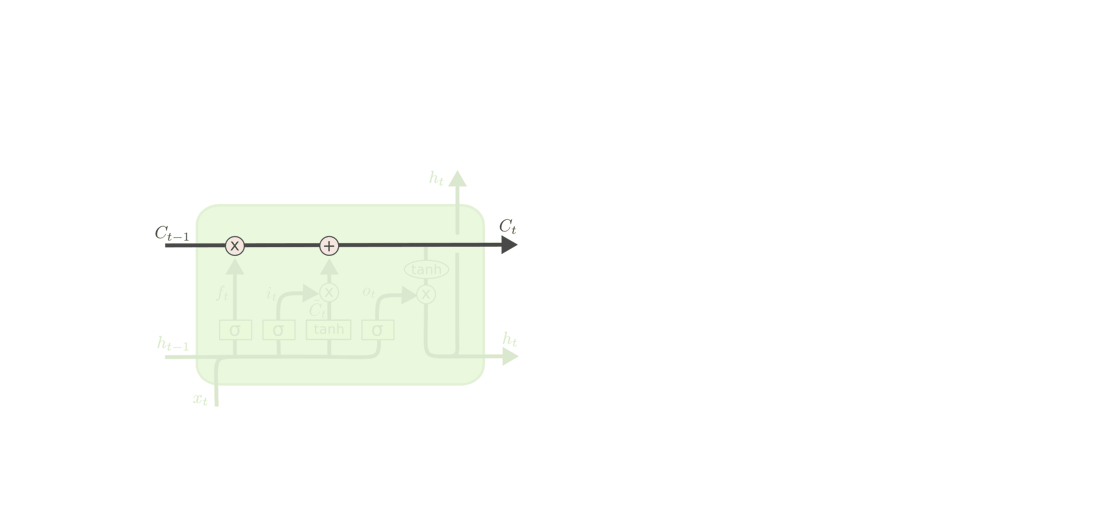

# Learning Objectives  
Part 1: Describe how neural nets are used for modeling sequnces.  
Part 2: Implement LSTM models for a text classification problem and a text generation problem.

# Overview

A sequence is a collection of numbers, taking into account their order; repetition is allowed.

Python lists are a good elemental example - [1, 2, 2, -1] is a valid list and is different from [1, 2, -1, 2].

## 1.1 Recursion

A recursive function is a function that can call itself!

For a recursive function to be defined, there must be a base case that the function eventually reaches by repeatedly calling itself.

## 1.1.1 The factorial function  
A simple example of recursion is the factorial function,
denoted by the character ! following a non-negative integer.  
n!= n * (n - 1) * (n - 2) * ... * 1  
And 0! = 1  
Where = means "is defined as"

In [10]:
def factorial(n):
    if (n == 0 or n == 1):
        return 1 # base case
    elif (n > 1):
        return n * factorial (n - 1)
factorial(5)

120

5 != 5 * 4 * 3 * 2 * 1

In [9]:
factorial(5)

120

## 1.1.2 The Fibonacci Sequence

Before we dive into the inner workings of an LSTM model, let's try to understand and appreciate recursion in sequences.
A recursive sequence is a sequence in which the next number can be computed from one or more of the previous numbers via a recurrence relation. Recursion occurs in both pure mathematics and in the physical world in which we find ourselves embedded.  
The root word is recur, which means "to occur repeatedly". Given a few consecutive values, the rest of a recursive sequence can be generated by repeatedly applying its recursion relation!  As usual, we attempt to understand a concept from at least 3 different perspectives:  
As usual, we attempt to understand a concept from at least 3 different perspectives:  
- Algebraic  
- Geometric  
- Coding  
A famous example of a recursive sequence in mathematics is the Fibonacci numbers. Fibonacci was an Italian mathematician, who wrote about these numbers in The Book of Calculation, in 1202 AD. Although the sequence is named after him, it was known long before his time in India.  
The Fibonacci numbers are an infinite sequence of integers, beginning with [0, 1] in which the ith number (for i > 1) is the sum of the two previous numbers.  
Here is the algorithm for generating the numbers in the fibonacci sequence:  
Fn = Fn-1 + Fn-2  
You need a base case F0 = 0 and F1 = 1 to get the sequence started.  
Starting from the base case, recursion relation generates the entire sequence.  
So we want a recursive function that, given an integer n computes the nth fibonacci number by repeatedly calling itself.

In [11]:
def fibo(n):  
    '''Calculate and return the next number in the fibo sequence  
    input: n: int or float:
        The nth number in the sequence (think of it like an index for a list)
    return:
        f_n: next num in sequence from previous two numbers
    '''
    if n <= 1: # the base case
        F_n = n
    elif n > 1:
        F_n = fibo(n - 1) + fibo(n - 2)
    return F_n

In [12]:
[fibo(n) for n in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [13]:
fibo(20)

6765

Recursive algorithms have as input their previous output.
In other words, the output at time step t - 1, becomes the input for the following time step t.

This key idea of recursion underlies the construction of a Recurrent Neural Networks (RNNs).

# 1.2 Introduction to Recursive Neural Networks (RNNs)

Now that we've gained insight into the recursion process, we can build on
our intuition to help us understand how RNNs and LSTMs work.  
Recurrent Neural Networks (RNNs) have a recursive loop in their architecture. The RNN model was first formulated in the original backpropagation paper by Rumelhart et al. in 1986, based on the standard Fully-Connected Feed-Forward (FCFF) model:  
  
The hidden state h has the same dimensionality as the input vector x and is updated at each step t, according to two inputs: xt and the previous hidden state ht-1. Since for the first input x0, the previous hidden state is undefined, and is often initialized to all zeros.  
The key to the RNN is the recursive use of the hidden state to learn and carry forward information about all the previous elements of the input sequence.  
In principle, this "memory" feature of the RNN is an exciting concept that holds the promise to go beyond "bag-of-words" models in NLP to be able to encode contextual meaning of sequences of words in documents. However, the practical limitations of RNNs has prevented them from fully delivering on this promise.  
RNNs:  
- Don't have long-term memory capacity, so cannot learn from input sequences longer than a few dozen elements long.  
- Suffer from the vanishing gradient problem.  

To mitigate against these limitations, Hochreiter and Schmidhuber invented the LSTM model in 1996.

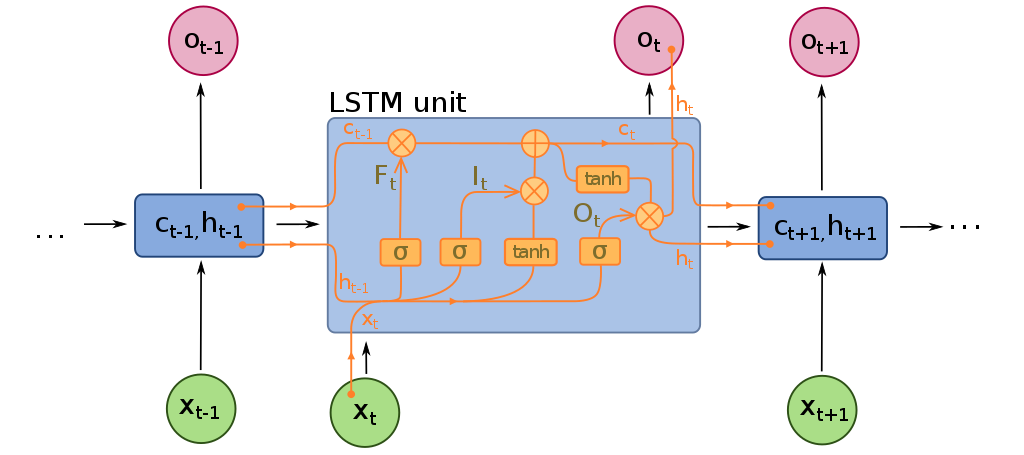  
Wow! There's a lot going on here, isn't there?
In the next section, we'll break down the LSTM model bit-by-bit so, we can understand a bird's eye view of what is happening.

## 1.3 Overview of the LSTM (Long Short Term Memory)  
For this course we will regard the LSTM as a black box, which functions as souped-up, more powerful version of the RNN. You will be responsible for being able to implement and use the LSTM models. Understanding how LSTMs work under the hood is optional, depending on your curiosity and interest.  
### 1.3.1 The Vanishing Gradient Problem   
RNNs and LSTMs, like other neural networks we've encountered, are trained using backpropagation with some form of gradient descent. For an "unrolled" RNN (or LSTM), backpropagation has to go back through the entire time sequence of states, which is why it's called BPTT (backpropagation through time). If a gradient "vanishes", i.e. becomes close to zero somewhere along the line, the parameter updates also "vanish", and network training slows down and grinds to a halt because the parameters are becoming vanishingly small. This is the "vanishing gradient problem", which LSTMs were invented to solve. LSTMs are superior to RNNs because they can remember longer sequences and do not suffer from vanishing gradients.  
Understanding LSTM Networks by Chris Olah presents a beautifully clear and concise explanation of the model's architecture and the mathematics (mostly matrix multiplication) behind it. This article will serve as our main resource for understanding how LSTMs work.  
Below are the equations for each of the gates in the LSTM architecture that are explained in the article.  
Although, you will not be held responsible for the equations in any quiz, module assignment, or Sprint Challenge - it is still instructive to have a look at the machinery inside the black box.  
First thing to notice is that each gate equation (not the cell states) has the form of a perceptron.  
Remember the perceptron? It's the fundamental building block of neural networks - it's not going away!  
Once you understand that, it will hopefully become gradually clear that each gate is a perceptron with a different job to do.  
That's it.  
It's just 4 perceptrons, each with a different job to do.  
Fortunately, you already know about perceptrons (you built one from scratch in Sprint 2 Module 1).

### 1.3.2 LSTM Gates

Forget Gate:  
This neuron's job is to use the current input to learn what information the cell state should forget regarding long-term dependencies.  
The output from the forget gate ft is used to scale the old cell state.  
- If ft is closer to 0.0, then less information from the previous cell is retained.  
- If ft is closer to 1.0, then more information from the previous cell is retained.  

Input Gate:  
This neuron's job is to use the current input to learn what new information to include in the cell state.  
Candidate Cell State:  
This neuron's job is to use the current input to create a candidate cell state. This candidate cell state will be used to update the model's final cell state.  
New Cell State:  
This is where the candidate and old cell sre combined to create a new cell state. It is also where the output of the input gate it is used to scale the candidate cell state.  
- If it is closser to 0.0, then less information from the candidate cell state is retained.  
- If it is closer to 1.0, then more information from the candidate cell state is retained.  
Finally you form a linear combination of the cell state Ct-1 from the previous time step with the candidate cell state Ct from the current time step to form the model's new cell state Ct of the model.  
The cell state Ct will be passed into the next training step and used to update the cell and hidden states for the next step.  
Output Gate:  
This is where the actual output of the model is calculated.

This neuron's job is to take the current input and make a prediction.  
Recall that the tanh activation maps numbers on the real line to numbers on the interval [-1, 1].  
So the presence o the factor tanh(Ct) makes it possible to have positive or negative vaues for the model's final output.  
Sigmoids don't allow for the possibility of negative values, but tanh does.   

## 1.4 Applications of LSTMs  
So why are LSTMs cool?

One compelling application is language modeling - language is inherently ordered data (letters/words go one after another, and the order matters). The Unreasonable Effectiveness of Recurrent Neural Networks is a famous blog post by Andrej Karpathy on this topic, worth reading.  
A language model is simply a model that, given some text, predicts the most likely next word, or character.  
Language models are essentially self-supervised -- the "label" or "target" for any text string is the next word (or character).
The data set already has the answers!  
Another interesting application of LSTMs is to text classification problems such as the sentiment classification problem we encountered in Unit 4, Sprint 1. Since LSTMs can learn contextual information about sequences of words, they can learn for example, that "the service is not so great" does not indicate a positive sentiment.  
For our purposes, we'll use TensorFlow and Keras to train LSTMs with text data.  
Note: These days, Transformer models surpass LSTMs for most Natural Language Processing tasks. Interestingly, people have recently adapted Transformers -- which were developed to solve text NLP problems --- to work with Computer Vision tasks, and their performance now rivals that of Convolutional Neural Networks (which we'll introduce in the next Module)! So if you're interested in learning about state of the art NLP models, your next step is Transformers. The Free Hugging Face Transformers Course is a great resource.

# 2. Sentiment Classification with RNN/LSTM -- Follow Along

RNNs and LSTMs are great for modeling any kind of data that comes in ordered sequences.
There are an astonishing variety of sequences in our world, such as

- words in a document
- musical notes or chords in a song
- sounds in an audio recording
- daily stock prices
- DNA base pairs
- medical sensor time series data, such as voltage measurements in an EKG
- etc.!  

Can you think of other examples of sequence data?

To illustrate the power of Neural Networks for modeling sequences,
we'll focus on text data, and apply LSTMs to a simple sentiment classification task.

The Internet Movie Database (IMDb) is a database of movie reviews in text format, along with the sentiment label(positive or negative), coresponding to each review.

The movie review labels are binary:  
- 1: review is positive  
- 2: review is negative  

In this exercise, we will train a sentiment classification model that can predict from the text whether a movie review is "thumbs-up" or "thumbs-down".

In [14]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# load dataset
max_features = 20000
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


The data is a list of reviews
Each review has been transformed to a list of numerical word encodings.
Each review may have a different number of words.
The number of words in our vocabulary is 20000

In [16]:
print(type(x_train))
print(x_train.shape)
print(type(x_train[0]))
print(len(x_train[0]))
print(len(x_train[101]))

<class 'numpy.ndarray'>
(25000,)
<class 'list'>
218
145


In [17]:
# first 80 word indices for the numerically encoded first review
x_train[0][:20]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25]

What are the lengths of the longest and shortest reviews in the training set?  

In [19]:
review_lengths = [len(x_train[i]) for i in range(len(x_train))]

(array([1.7598e+04, 5.3690e+03, 1.4070e+03, 5.1700e+02, 9.4000e+01,
        7.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  259.3,  507.6,  755.9, 1004.2, 1252.5, 1500.8, 1749.1,
        1997.4, 2245.7, 2494. ]),
 <BarContainer object of 10 artists>)

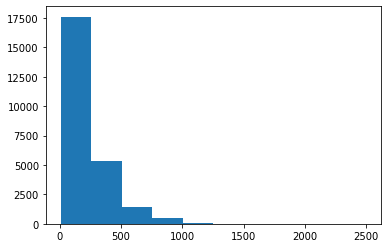

In [20]:
plt.hist(review_lengths)

In [21]:
print(f'longest review is { np.max( review_lengths ) } words')
print(f'shortest review is { np.min( review_lengths ) } words')
print(f'median review length { np.median( review_lengths ) } words')

longest review is 2494 words
shortest review is 11 words
median review length 178.0 words


We will standardize the length of our movie reviews to maxlen = 80 words
The pad_sequences method from tensorflow.keras.preprocessing.sequence
provides a convenient way to accomplish this task  
- Reviews longer than maxlen will be truncated to the first maxlen words  
- Reviews shorter than maxlen will be padded with zeros at the beginning to increase their length to maxlen.

In [33]:
maxlen = 80
print(f"Pad or truncate sequences to a length of {maxlen}")  
x_train = sequence.pad_sequences(x_train, maxlen = maxlen, padding = "pre",
                                 truncating = 'post')  

x_test = sequence.pad_sequences(x_test, maxlen = maxlen, padding = "pre",
                                truncating = "post")
print("x_train shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

Pad or truncate sequences to a length of 80
x_train shape:  (25000, 80)
x_test.shape:  (25000, 80)


In [34]:
x_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17])

Each review is truncated to the first 80 words

The labels are classes: 0 for negative, 1 for positive

In [36]:
np.unique(y_train)

array([0, 1], dtype=int64)

## Build a LSTM language model with 1 hidden layer

In [38]:
# build a 1 layer LSTM language model
from tensorflow.keras.optimizers import Adam
# specify learning rate and optimizer
opt = Adam(learning_rate = 1.e-7)
# build model by instantiating a sequential class
model = Sequential()
# input layer
# adding an embedding layer
model.add(Embedding(input_dim = max_features, output_dim = 128))
# hidden layer 1
model.add(LSTM(128, return_sequences = False))
# output layer
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


Use a learning rate schedule callback to find the best learning rate!  
Note that for this part, we don't need to pass the test data to the fit method.

In [ ]:
%%time
# specify batch size
batch_size = 32
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10 ** (epoch / 2))
results_one_layer = model.fit(x_train, y_train,
                              batch_size = batch_size,
                              epochs = 10, callbacks = [lr_schedule])

Epoch 1/10
782/782 [==============================] - 118s 146ms/step - loss: 0.6930 - accuracy: 0.5190 - lr: 1.0000e-05
Epoch 2/10
782/782 [==============================] - 121s 154ms/step - loss: 0.6126 - accuracy: 0.6541 - lr: 3.1623e-05
Epoch 3/10
782/782 [==============================] - 115s 147ms/step - loss: 0.4184 - accuracy: 0.8136 - lr: 1.0000e-04
Epoch 4/10
782/782 [==============================] - 2153s 3s/step - loss: 0.3479 - accuracy: 0.8514 - lr: 3.1623e-04
Epoch 5/10
782/782 [==============================] - 79s 101ms/step - loss: 0.3401 - accuracy: 0.8602 - lr: 0.0010
Epoch 6/10
286/782 [=========>....................] - ETA: 59s - loss: 0.3576 - accuracy: 0.8578 